In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
market_demand = pd.read_csv("FACT_MARKET_DEMAND-001.csv")

In [4]:
market_demand.head()

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM
0,2021-08-21,524,DIET/LIGHT,SSD,69.0,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...
1,2022-05-07,637,REGULAR,SSD,4.0,30.96,COCOS,GORGEOUS ORANGEOUS,12SMALL 12ONE CUP,GORGEOUS SUNSET OUS GENTLE DRINK AVOCADO CUP ...
2,2022-10-22,628,DIET/LIGHT,ING ENHANCED WATER,1.0,2.25,JOLLYS,DIGRESS FLAVORED,20SMALL MULTI JUG,DIGRESS ZERO NUTRIENT ENHANCED WATER BVRG PURP...
3,2022-08-13,216,REGULAR,SSD,3.0,7.55,COCOS,CHERRY FIZZ,1L MULTI JUG,KOOL! RED GENTLE DRINK RED COLA CONTOUR JUG ...
4,2022-01-01,210,REGULAR,SSD,4.0,25.96,COCOS,RADIANT'S,12SMALL 12ONE CUP,RADIANT'S GENTLE DRINK GINGER ALE CUP 12 LIQUI...


# Q2

## Item Description: Sparkling Jacceptabletlester Avocado 11Small MLT
- Caloric Segment: Regular
- Market Category: SSD
- Manufacturer: Swire-CC
- Brand: Sparkling Jacceptabletlester
- Package Type: 11Small MLT
- Flavor: ‘Avocado’
### Swire plans to release this product 2 weeks prior to Easter and 2 weeks post Easter. What will the forecasted demand be, in weeks, for this product?

#### Lets filter the data that contains avocado in the product.

In [5]:
avocado = market_demand[(market_demand['ITEM'].str.contains('AVOCADO', case=False, regex=True))]

In [6]:
avocado.head()

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM
1,2022-05-07,637,REGULAR,SSD,4.0,30.96,COCOS,GORGEOUS ORANGEOUS,12SMALL 12ONE CUP,GORGEOUS SUNSET OUS GENTLE DRINK AVOCADO CUP ...
7,2021-11-27,499,DIET/LIGHT,SSD,3.0,10.00,JOLLYS,HILL MOISTURE ZERO SUGAR,.5L 6ONE JUG,RAINING ZERO SUGAR GENTLE DRINK AVOCADO ZERO ...
9,2022-04-02,895,REGULAR,SSD,57.0,173.33,JOLLYS,HILL MOISTURE MAJOR MELON,.5L 6ONE JUG,RAINING GENTLE DRINK MAJOR CANES AVOCADO JUG...
31,2021-10-02,862,REGULAR,SSD,24.0,123.05,JOLLYS,HILL MOISTURE MAJOR MELON,12SMALL 12ONE CUP,RAINING GENTLE DRINK MAJOR CANES AVOCADO CUP...
41,2021-02-13,244,REGULAR,SSD,9.0,39.79,JOLLYS,HILL MOISTURE,7.5SMALL 10ONE CUP,RAINING GENTLE DRINK AVOCADO CUP 7.5 LIQUID S...


#### There is enough data that we can use to find a solution to the problem.

In [8]:
avocado.shape

(1856438, 10)

#### Swire-CC is 2nd in making avocado flavors. Dropping duplicates will let us see products that we're launch regardless of packaging.

In [6]:
avocado[['MANUFACTURER','ITEM']].drop_duplicates()['MANUFACTURER'].value_counts()

MANUFACTURER
JOLLYS      236
SWIRE-CC     46
COCOS        43
BEARS        11
PONYS         4
Name: count, dtype: int64

#### SSD as the top category in the avocado flavor which is what Swire is planning to launch.

In [7]:
avocado['CATEGORY'].value_counts()

CATEGORY
SSD                   1631006
ENERGY                  88786
ING ENHANCED WATER      76250
SPARKLING WATER         60396
Name: count, dtype: int64

#### Check to see manufacturers already have avocado drink released prior to the earliest data that we have.

In [8]:
earliest_launch_dates_avocado = avocado.groupby('MANUFACTURER')['DATE'].min().reset_index()
earliest_launch_dates_avocado.columns = ['MANUFACTURER', 'EARLIEST_LAUNCH_DATE']

#### It seems that companys already sold avocado drinks earlier than our observation window.

In [9]:
earliest_launch_dates_avocado

,MANUFACTURER,EARLIEST_LAUNCH_DATE
0,BEARS,2020-12-05
1,COCOS,2020-12-05
2,JOLLYS,2020-12-05
3,PONYS,2020-12-05
4,SWIRE-CC,2020-12-05


#### Looking in depth in just the 2 weeks prior and after in Easter time. Given that the dataq starts December 2020, we will ignore easter on that year.

In [10]:
avocado['DATE'] = pd.to_datetime(avocado['DATE'])

avocado['Week_Number'] = avocado['DATE'].dt.strftime('%U').astype(int)
avocado['Year'] = avocado['DATE'].dt.year

easter_week_2021 = 13
easter_week_2022 = 15
easter_week_2023 = 14

avocado_2021 = avocado.loc[(avocado['Week_Number']>=easter_week_2021 - 2) & (avocado['Week_Number']<=easter_week_2021 + 2) & (avocado['Year']==2021)]
avocado_2022 = avocado.loc[(avocado['Week_Number']>=easter_week_2022 - 2) & (avocado['Week_Number']<=easter_week_2022 + 2) & (avocado['Year']==2022)]
avocado_2023 = avocado.loc[(avocado['Week_Number']>=easter_week_2023 - 2) & (avocado['Week_Number']<=easter_week_2023 + 2) & (avocado['Year']==2023)]
avocado_all_easter = pd.concat([avocado_2021,avocado_2022,avocado_2023])

C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_14036\3851170581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado['DATE'] = pd.to_datetime(avocado['DATE'])
C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_14036\3851170581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado['Week_Number'] = avocado['DATE'].dt.strftime('%U').astype(int)
C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_14036\3851170581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

#### Lets graph the unit sales demand by year of avocado drinks

#### Hypothesis 1. Is there a significant increase in unit sales of avocado drinks during the 2 weeks before and after Easter compared to other times of the year?

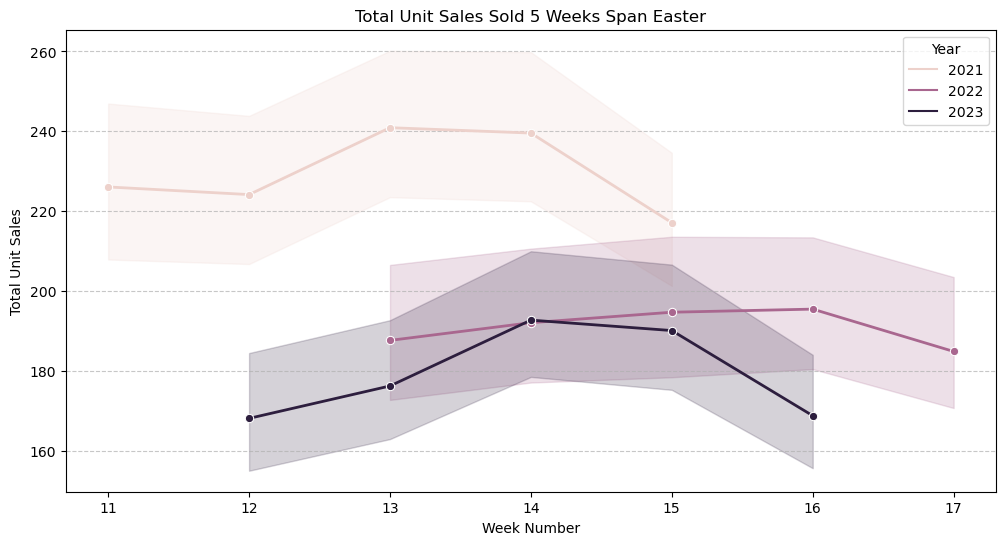

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week_Number', y='UNIT_SALES', data=avocado_all_easter, hue='Year', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Total Unit Sales Sold 5 Weeks Span Easter')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

#### Visual look of the graph per year shows a hump/increase in the exact week of easter.

#### Let's look a closer look on each year by manufacturer.

#### Hypothesis 2. Does the manufacturer's market position (in terms of avocado drink sales) influence the magnitude of sales increase during the Easter period?

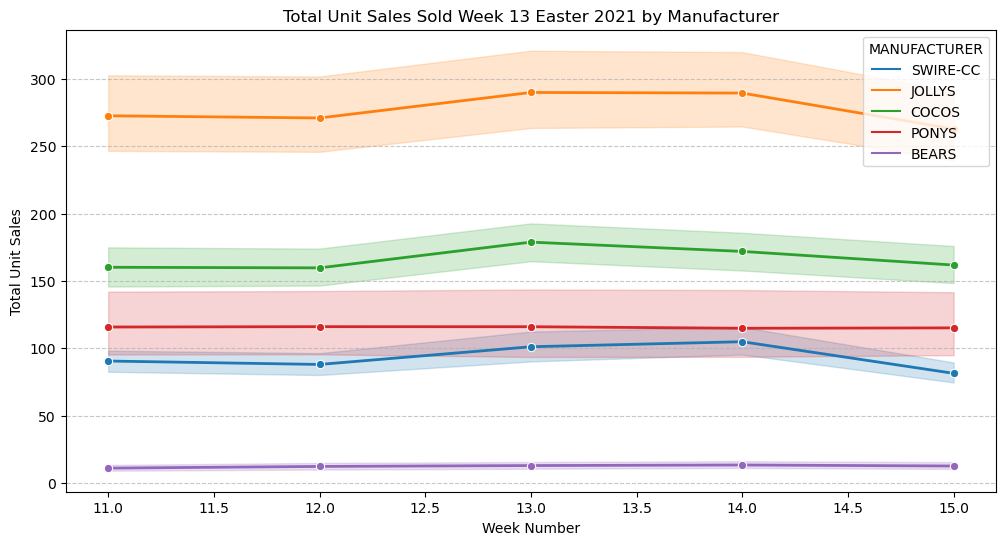

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week_Number', y='UNIT_SALES', hue='MANUFACTURER', data=avocado_2021, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Total Unit Sales Sold Week 13 Easter 2021 by Manufacturer')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

#### 2021: Swire places 4th on the total units sold with Jollys being the top seller of avocado drinks. Swire, Jollys, and cocos shows a hump on easter week suggesting more demand on the holiday.

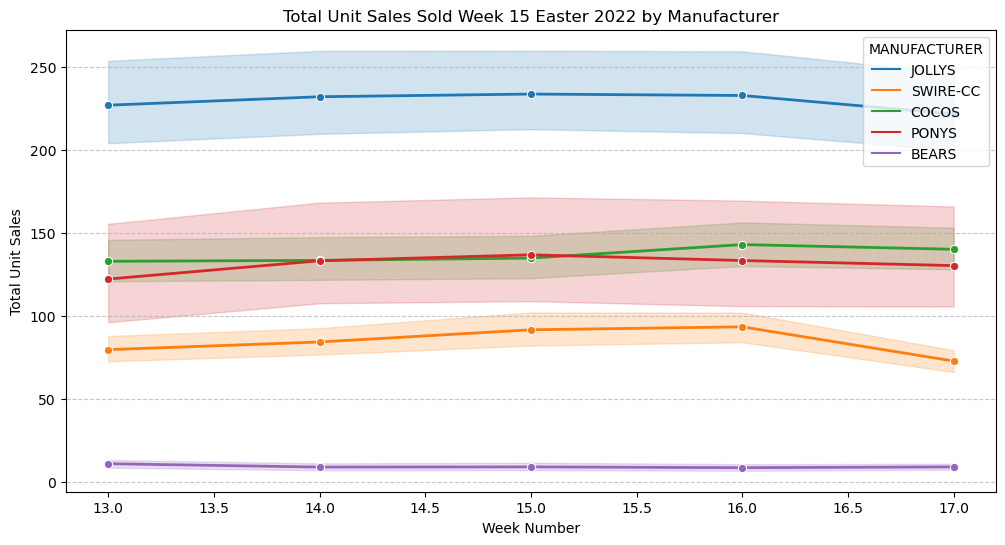

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week_Number', y='UNIT_SALES', data=avocado_2022, hue='MANUFACTURER', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Total Unit Sales Sold Week 15 Easter 2022 by Manufacturer')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

#### 2022: From 4th, Swire is now tied with cocos in total units sold in this year. All but except bears shows a hump in easter week.

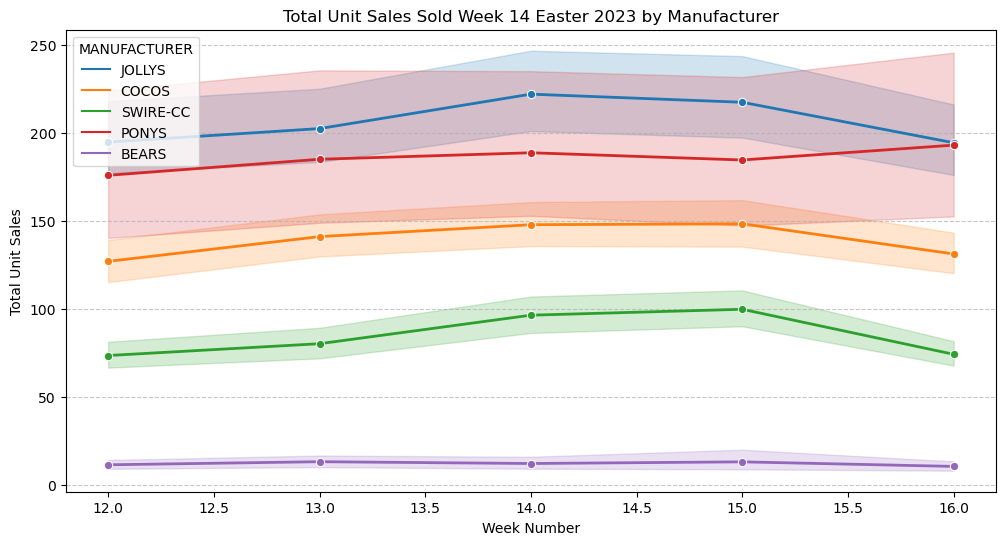

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week_Number', y='UNIT_SALES', data=avocado_2023, hue='MANUFACTURER', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Total Unit Sales Sold Week 14 Easter 2023 by Manufacturer')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

#### 2023: Swire went down again as 4th total units sold in 2023 with a signifcant difference between the top 3 manufacturers. It does show a big hump on easter week for swire.

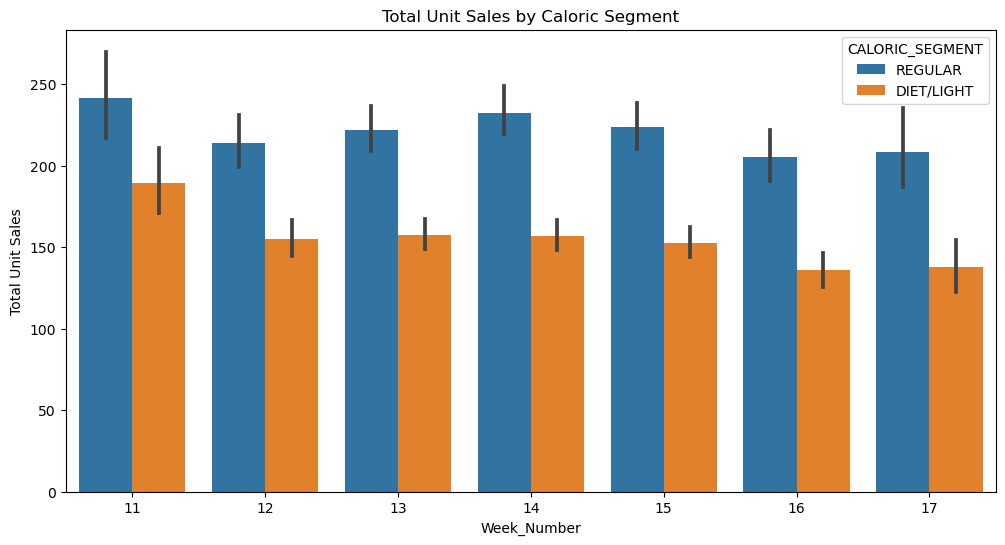

In [15]:
#Segment, Category, Package
plt.figure(figsize=(12, 6))
sns.barplot(x='Week_Number', y='UNIT_SALES', data=avocado_all_easter, hue='CALORIC_SEGMENT')
plt.title('Total Unit Sales by Caloric Segment')
plt.xlabel('Week_Number')
plt.ylabel('Total Unit Sales')
plt.show()

#### Regular shows a more demand than diet in the avocado drinks. 

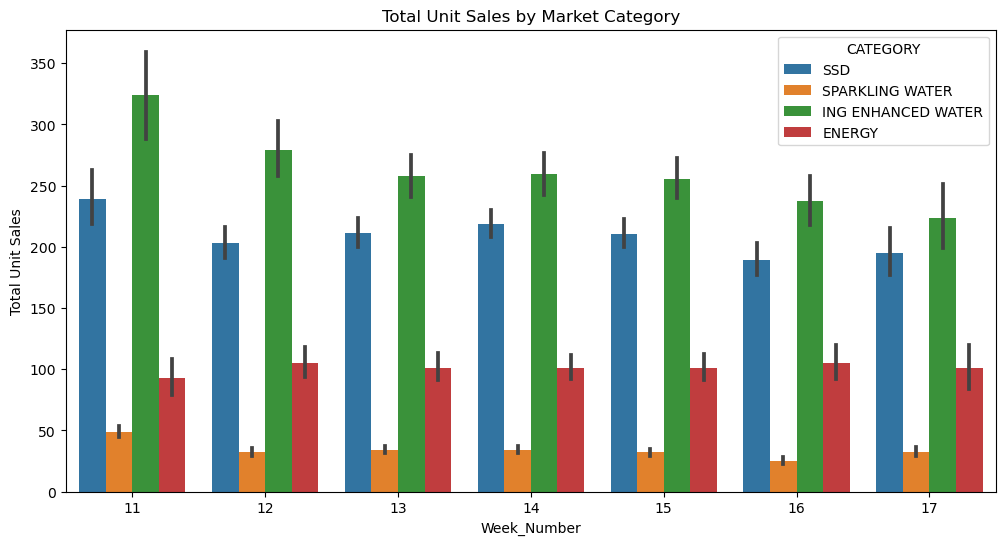

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Week_Number', y='UNIT_SALES', data=avocado_all_easter, hue='CATEGORY')
plt.title('Total Unit Sales by Market Category')
plt.xlabel('Week_Number')
plt.ylabel('Total Unit Sales')
plt.show()

#### Enhance water is the most sold then just a little bit shy is SSD.

In [17]:
avocado[(avocado['PACKAGE'].str.contains('11SMALL', case=False, regex=True))]['PACKAGE'].value_counts()

PACKAGE
11SMALL 6ONE CUP    4310
Name: count, dtype: int64

#### Swire plans to release a package type of 11Small MLT which we do not have data that contains avocaod flavor.

#### Let's look at the overall data if there's an exisiting package.

In [18]:
market_demand[(market_demand['PACKAGE'].str.contains('11SMALL', case=False, regex=True))]['PACKAGE'].value_counts()

PACKAGE
11SMALL 6ONE CUP    4310
Name: count, dtype: int64

#### There is no exisiting data of 11SMALL MLT.

## Summary

We explored into historical sales data to forecast demand, highlighting the significance of timing the product release two weeks before and after Easter to maximize market penetration of the Sparkling Jacceptabletlester Avocado 11Small MLT which Swire plans to release. By filtering data for products containing avocado, the analysis identifies trends and patterns in consumer preferences and sales performance, underscoring Swire's position as the second-leading manufacturer of avocado-flavored beverages. We explored the broader market dynamics, including manufacturer rankings and category performance, to provide a comprehensive outlook on the potential success of the Sparkling Jacceptabletlester Avocado 11Small MLT. Through detailed data visualization, it reveals a seasonal demand spike for avocado drinks around Easter, with Swire and its competitors experiencing varying degrees of sales uplift. 

## Modelling Plan:

- Descriptive Analysis: Continue to explore the data to understand the distribution, trends, and patterns of sales across different time frames and manufacturers.
- Seasonal Demand Analysis: Employ time series analysis to quantify the extent of seasonal demand around Easter. This could involve ARIMA (AutoRegressive Integrated Moving Average) models to forecast sales and identify seasonal patterns.
- Comparative Analysis: Use ANOVA (Analysis of Variance) to test if the differences in sales among manufacturers during the Easter period are statistically significant.
- Regression Analysis: Develop regression models to predict the factors influencing the sales volume of avocado drinks. This could include variables like manufacturer ranking, market share, historical sales data, and seasonal timing (Easter period).
- Market Share Modelling: Apply market basket analysis to understand the association between different products and manufacturers. This could help in strategizing product placements and promotions during peak demand seasons.